In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("entropy_4.xlsx")
df = pd.DataFrame(data)
df = df.dropna(axis = 1)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [6]:
import math

def entropy(data):
    count = {}
    total = len(data)
    for row in data:
        label = row[-1]
        if label not in count:
            count[label] = 0
        count[label] += 1
    entropy = 0
    for label in count:
        prob = count[label] / total
        entropy -= prob * math.log2(prob)
    return entropy


def information_gain(data, attribute_index):
    attribute_values = {}
    total = len(data)
    for row in data:
        value = row[attribute_index]
        if value not in attribute_values:
            attribute_values[value] = []
        attribute_values[value].append(row)
    gain = entropy(data)
    for value, subset in attribute_values.items():
        prob = len(subset) / total
        gain -= prob * entropy(subset)
    return gain


attributes = ["age", "income", "student", "credit_rating"]


ig_values = {}
for i, attribute in enumerate(attributes):
    ig = information_gain(data, i)
    ig_values[attribute] = ig


root_node = max(ig_values, key=ig_values.get)

print("Information Gain for each attribute:")
for attribute, ig in ig_values.items():
    print(f"{attribute}: {ig}")

print(f"The root node for the decision tree is: {root_node}")

Information Gain for each attribute:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.048127030408269544
The root node for the decision tree is: age


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

X = [row[:-1] for row in data]
y = [row[-1] for row in data]


label_encoders = [LabelEncoder() for _ in range(len(X[0]))]

for i in range(len(label_encoders)):
    X_column = [row[i] for row in X]
    X_column_encoded = label_encoders[i].fit_transform(X_column)
    for j in range(len(X)):
        X[j][i] = X_column_encoded[j]

model = DecisionTreeClassifier()
model.fit(X, y)
tree_depth = model.get_depth()
print("Depth of the constructed tree:", tree_depth)

Depth of the constructed tree: 4


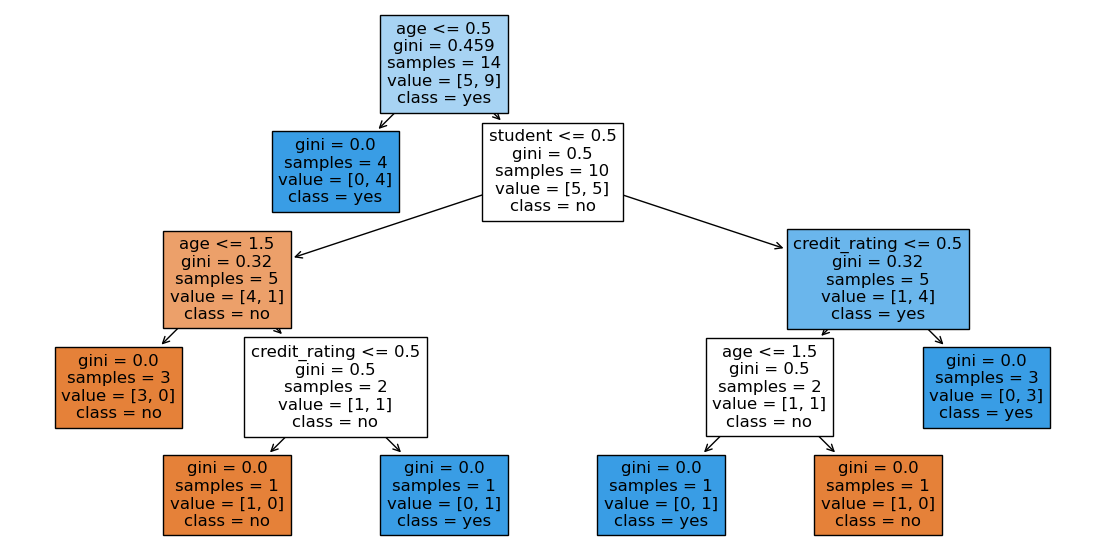

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier()

model.fit(X, y)
plt.figure(figsize=(14, 7))
plot_tree(model, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

combined_X = Tr_X + Te_X

label_encoders = [LabelEncoder() for _ in range(len(Tr_X[0]))]

for i in range(len(label_encoders)):
    combined_X_column = [row[i] for row in combined_X]
    combined_X_column_encoded = label_encoders[i].fit_transform(combined_X_column)
    
    for j in range(len(combined_X)):
        combined_X[j][i] = combined_X_column_encoded[j]

Tr_X_encoded = combined_X[:len(Tr_X)]
Te_X_encoded = combined_X[len(Tr_X):]

model = DecisionTreeClassifier()
model.fit(Tr_X_encoded, Tr_y)

training_accuracy = model.score(Tr_X_encoded, Tr_y)
test_accuracy = model.score(Te_X_encoded, Te_y)

print("Training Set Accuracy:", training_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 1.0
Test Set Accuracy: 0.3333333333333333


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=5)

model.fit(Tr_X_encoded, Tr_y)

Tr_y_pred = model.predict(Tr_X_encoded)
Te_y_pred = model.predict(Te_X_encoded)

training_accuracy = accuracy_score(Tr_y, Tr_y_pred)
test_accuracy = accuracy_score(Te_y, Te_y_pred)

print("Training Set Accuracy (with max_depth constraint):", training_accuracy)
print("Test Set Accuracy (with max_depth constraint):", test_accuracy)

Training Set Accuracy (with max_depth constraint): 1.0
Test Set Accuracy (with max_depth constraint): 0.3333333333333333
